# Выпускной проект

# Анализ базы данных сервиса для чтения книг

Компания купила крупный сервис для чтения книг по подписке и нуждается в анализе базы данных, чтобы сформулировать ценностное предложение для нового продукта

**Цель исследования:** проанализировать базы данных и дать представление компании о книгах, издательствах, авторах, а также пользовательских обзорах книг, которые помогут в развитии сервиса

# Описание данных

1) `Таблица books - данные о книгах`
* book_id — идентификатор книги;
* author_id — идентификатор автора;
* title — название книги;
* num_pages — количество страниц;
* publication_date — дата публикации книги;
* publisher_id — идентификатор издателя.

2) `Таблица authors - данные об авторах`
* author_id — идентификатор автора;
* author — имя автора.

3) `Таблица publishers - данные об издательствах`
* publisher_id — идентификатор издательства;
* publisher — название издательства.

3) `Таблица ratings - данные о пользовательских оценках книг`
* rating_id — идентификатор оценки;
* book_id — идентификатор книги;
* username — имя пользователя, оставившего оценку;
* rating — оценка книги.

4) `Таблица reviews - данные о пользовательских обзорах`
* review_id — идентификатор обзора;
* book_id — идентификатор книги;
* username — имя автора обзора;
* text — текст обзора.



# Схема данных

![Схема данных](https://pictures.s3.yandex.net/resources/scheme_1589269096.png)


**Задания**

1) Посчитайте, сколько книг вышло после 1 января 2000 года;

2) Для каждой книги посчитайте количество обзоров и среднюю оценку;

3) Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;

4) Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;

5) Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

# Загрузка и обзор данных

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import text, create_engine


Исследуем таблицы - выведем первые строки

In [3]:
query = '''SELECT * FROM books LIMIT 5'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [4]:
query = '''SELECT * FROM authors LIMIT 5'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [5]:
query = '''SELECT * FROM publishers LIMIT 5'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [6]:
query = '''SELECT * FROM ratings LIMIT 5'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [7]:
query = '''SELECT * FROM reviews LIMIT 5'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


**Задание 1:**

Посчитайте, сколько книг вышло после 1 января 2000 года;


In [8]:
task1 = ''' SELECT COUNT(*) FROM books WHERE publication_date > '2000-01-01' '''

con=engine.connect()
pd.io.sql.read_sql(sql=text(task1), con = con)

,count
0,819


* после 1 января 2000 года вышло 819 книг

**Задание 2:**

Для каждой книги посчитайте количество обзоров и среднюю оценку;

In [9]:
task2 = ''' 

SELECT 
    books.title,
    books.book_id,
    rev.review_count,
    rat.rating_avg
FROM books LEFT JOIN 
                (SELECT
                    book_id,
                    AVG(rating) AS rating_avg
                FROM
                    ratings
                GROUP BY 
                    book_id
                ) AS rat ON rat.book_id = books.book_id
        LEFT JOIN
                (SELECT 
                    book_id,
                    COUNT(review_id) AS review_count
                FROM
                    reviews
                GROUP BY 
                    book_id
                ) AS rev ON rev.book_id = books.book_id
                
; ''' 

con=engine.connect()
task_2 = pd.io.sql.read_sql(sql=text(task2), con = con)
task_2

,title,book_id,review_count,rating_avg
0,The Body in the Library (Miss Marple #3),652,2.0,4.500000
1,Galápagos,273,2.0,4.500000
2,A Tree Grows in Brooklyn,51,5.0,4.250000
3,Undaunted Courage: The Pioneering First Missio...,951,2.0,4.000000
4,The Prophet,839,4.0,4.285714
...,...,...,...,...
995,Alice in Wonderland,64,4.0,4.230769
996,A Woman of Substance (Emma Harte Saga #1),55,2.0,5.000000
997,Christine,148,3.0,3.428571
998,The Magicians' Guild (Black Magician Trilogy #1),790,2.0,3.500000


In [10]:
round(task_2.drop('book_id', axis=1).describe(),1)

,review_count,rating_avg
count,994.0,1000.0
mean,2.8,3.9
std,1.1,0.6
min,1.0,1.5
25%,2.0,3.5
50%,3.0,4.0
75%,3.0,4.3
max,7.0,5.0


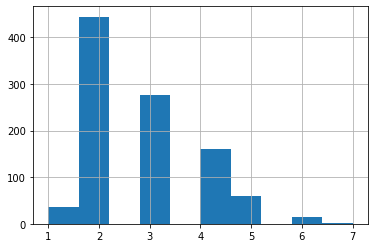

In [11]:
task_2['review_count'].hist();

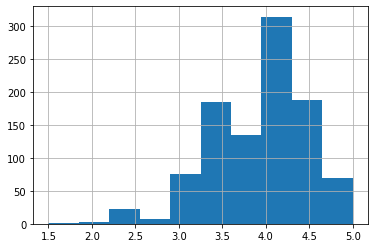

In [12]:
task_2['rating_avg'].hist();

* мы получили информацию о 1000 книгах
* книги получают от 1 до 7 отзывов, большая часть книг имеет 2-3 отзыва
* рейтинг книг варьируется от 1.5 до 5, большая часть книг имеет рейтинг от 3.5 до 4.3

**Задание 3:**

Определите издательство, которое выпустило наибольшее число книг толще 50 страниц 

In [13]:
task3 = ''' 
SELECT
    pub_info.pub_id,
    pub_info.publisher,
    pub_info.books_count
FROM
    (SELECT 
        books.publisher_id AS pub_id,
        COUNT(books.book_id) AS books_count,
        publishers.publisher AS publisher
    FROM 
        books 
        LEFT JOIN publishers ON books.publisher_id=publishers.publisher_id

    WHERE 
        num_pages>50
    GROUP BY
        books.publisher_id,
        publishers.publisher
    ORDER BY 
        books_count DESC) AS pub_info
LIMIT 1
; ''' 

con=engine.connect()
pd.io.sql.read_sql(sql=text(task3), con = con)


,pub_id,publisher,books_count
0,212,Penguin Books,42


Наибольшее число книг толще 50 страниц выпустило издательство Penguin Books, количество: 42 книги

**Задание 4:**

Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [14]:
task4 = ''' 
SELECT 
    author_avg.author,
    AVG(author_avg.avg_rating) AS avg_rat
FROM
        (SELECT 
            authors.author AS author, 
            AVG(ratings.rating) AS avg_rating
        FROM books
            LEFT JOIN authors ON books.author_id = authors.author_id
            LEFT JOIN ratings ON books.book_id = ratings.book_id
        GROUP BY 
             books.book_id,
             authors.author_id
        HAVING
            COUNT(ratings.rating_id) >=50 
        ) AS author_avg 
GROUP BY    
    author_avg.author
ORDER BY
    avg_rat DESC
LIMIT 1
    
; ''' 

con=engine.connect()
pd.io.sql.read_sql(sql=text(task4), con = con)

,author,avg_rat
0,J.K. Rowling/Mary GrandPré,4.283844


Автор с самой высокой средней оценкой книг (книги с 50 и более оценками) - J.K. Rowling/Mary GrandPré	

**Задание 5:**

Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

In [15]:
task5 = ''' 
SELECT
    AVG(users.review_count)
FROM
    (SELECT
        username,
        COUNT(review_id) AS review_count
    FROM
        reviews
    WHERE 
        username IN (
                SELECT 
                    username
                FROM 
                    ratings
                GROUP BY 
                    username
                HAVING 
                    COUNT(rating_id) > 48
                    )
    GROUP BY 
        username) AS users
; ''' 

con=engine.connect()
pd.io.sql.read_sql(sql=text(task5), con = con)

,avg
0,24.0


 Cреднее количество обзоров от пользователей, которые поставили больше 48 оценок - 24